# Classification with a control channel

_(working title)_

Gilles Louppe -- [@glouppe](https://twitter.com/glouppe) <br />
Tim Head -- [@betatim](https://twitter.com/betatim)

Last changes on July 30, 2015.

Things to show:

- We show that simulation imperfections (if they are discriminative in simulation) can be used by a classifier, therefore making his true performance lower. (this is known and the reason why the agreement test exists). 
- The test can be passed to perfection while using all simulation imperfections. => the choice of the control channel matters. If scoring data can be distinguished from control data, then this can be used to bypass the test, without necessarily avoiding the exploitation of simulation imperfections.
- We show that we can find by chance a classifier that is good at classifying agreement data from scoring data, and has a good score. => brute force and keep the one that is good at separating control data


TODOs:
- Even just looking at the agreement score in a trial and error cycle is subject to false positives
- Toy example
- Remove useless things from the text

# Setting

## Notations

Let us assume a set of _cases_ or _objects_ taken from a universe $\Omega$. Let us further assume that each object is described by a set of _measurements_ and let us arrange these measurements in some pre-assigned order, i.e., take the input values to be $x_1, x_2, ..., x_p$, where $x_j \in {\cal X}_j$ (for $j=1, ..., p$) corresponds to the value of the input variable $X_j$. Together, the input values $(x_1, ..., x_p)$ form a $p$-dimensioal input vector ${\bf x}$ taking its values in ${\cal X}_1 \times ... \times {\cal X}_p = {\cal X}$, where ${\cal X}$ is defined as the input space. Similarly, let us define as $y \in {\cal Y}$ the value of the output variable $Y$, where ${\cal Y}$ is defined as the output space. By definition, both the input and the output spaces are assumed to respectively contain all possible input vectors and all possible output values. 

_Note._ Input variables are also known as _features_ or _descriptors_, input vectors as _instances_ or _samples_ and the output variable as _target_ or _response_.

## Supervised learning

Let us assume a learning set ${\cal L}$ composed of $N$ pairs of input vectors and output values $({\bf x}_1, y_1), ..., ({\bf x}_N, y_N)$, where ${\bf x}_i \in {\cal X}$ and $y_i \in {\cal Y}$. In this framework, the supervised learning task can be stated as learning a function (or _model_) $\varphi : {\cal X} \mapsto {\cal Y}$ from ${\cal L}$. In particular, the objective is to find a model such that its predictions $\varphi({\bf x})$, also denoted by the variable $\hat{Y}$, are as good as possible.

In the statistical sense, input and output variables $X_1, ..., X_p$ and $Y$ are _random variables_ taking jointly their values from ${\cal X} \times {\cal Y}$ with respect to the joint probability distribution $P(X, Y)$, where $X$ denotes the random vector $(X_1, ..., X_p)$. That is, $P(X={\bf x}, Y=y)$ is the probability that random variables $X$ and $Y$ take values ${\bf x}$ and $y$ from ${\cal X}$ and ${\cal Y}$ when drawing an object uniformly at random from the universe $\Omega$.

Accordingly, trying to learn a model $\varphi_{\cal L}$ whose predictions are as good as possible can be stated as finding a model which minimizes its expected prediction error, also known as _generalization error_,

$$Err(\varphi_{\cal L}) = \mathbf{E}_{X,Y} L(Y,\varphi_{\cal L}(X)). $$

In practice, simplifying assumptions are made to solve supervised learning. In particular, one often assumes that the very best model, or at least a good approximation of it, lives in a family ${\cal H}$ of candidate models, also known as _hypotheses_, of restricted structure (e.g., the family of linear models or the family of decision trees). In this sense, learning amounts to construct or find a model in ${\cal H}$ for which the generalization error is (supposedly) as low as possible.

# Classification of events in high energy physics

_[GL: Tim, You might proofcheck this introductory paragraph :)]_

In high energy physics, experimentalists aim at building detectors for the observation and discovery of a phenomenon predicted by some theoretical model (e.g., the discovery of the Higgs boson, as predicted by the Standard Model). To achieve this, classifiers are built on simulated data and then used to evaluate real data as observed and recorded through the detector. Provided a classifier trained on simulated data properly transfers to real data, the goal is then to assess whether the predicted phenomenon does actually exist, with high probability. 

In machine learning terms, let us assume a universe of objects, or _events_, each described by a vector of physical input values ${\bf x} = (x_1, ..., x_p)$. Let us further assume that some of these events correspond to _signal_ ($y=s$), i.e. the phenomenon of interest, while the others correspond to _background_ ($y=b$), i.e. known and verified physical processes. 

In this setting, given a learning set ${\cal L}$ of simulated signal and real data background, supervised learning algorithms can be used to find a model $\varphi : {\cal X} \mapsto {\cal Y}$, where ${\cal Y} = \{s, b\}$, capable of distinguishing signal from background events given physical input values.

## Control channel

Because simulation in itself might not be exempt of inaccuracies, caution should be taken when learning a classifier $\varphi$ not to exploit simulation artefacts -- which do not exist on real data -- to separate signal from background. Exploiting these imperfections in the simulation would indeed lead to a model whose simulation performance might significantly differ from its actual performance on real data, therefore making it far less reliable in an actual experiment pipeline. 

To enforce this, the learned classifier is usually required not to have a large discrepancy when applied to simulated and real data. In practice, this can be verified by evaluating whether the classifier behaves differently on simulated and real data signal from a _control channel_, i.e. a phenomenon with a topology similar to the phenomenon under study, but with a well-known and well-observed behavior. 

More formally, let us assume a control channel dataset ${\cal C}$ made of simulated signal and real data events from a close phenomenon. We want to find a model $\varphi$ which is a good as possible, while verifying some constraint of the form $c(\varphi, {\cal C}) < t$. Equivalently, this can be stated as restricting the family ${\cal H}$ of candidate models to $\{\varphi \in {\cal H} | c(\varphi, {\cal C}) < t\}$. The open problem is then to adapt supervised learning algorithms to best navigate this restricted space of models. 

_Example._ $\tau \to 3 \mu$ using $Ds \to \phi \pi$ as control channel and a Kolmogorov-Smirnov test as constraint.



# Negative results: Control channel tests suffer from type I errors

_Proposition (False positives)._ Assuming control channel signal (simulated or real data) can be distinguished from the simulated signal under study, verifying some constraint $c(\varphi, {\cal C}) < t$ does not prevent a classifier $\varphi$ from actually exploiting simulation artefacts. 

_Proof._ TODO

# Toy example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
from scipy.stats import norm

parameters = {
    "signal-data": [(0, 1), (2, 1), (0, 1)],
    "signal-sim": [(3, 1), (2, 1), (0, 1)],
    "background-data": [(0, 1), (-1, 1), (0, 1)],
    "control-data": [(0, 1), (2, 1), (3, 1)],
    "control-sim": [(3, 1), (2, 1), (3, 1)],
}

def build(label, n_samples=10000):
    p = parameters[label]
    
    X = np.empty((n_samples, 3))
    X[:, 0] = norm(*p[0]).rvs(n_samples)
    X[:, 1] = norm(*p[1]).rvs(n_samples)
    X[:, 2] = norm(*p[2]).rvs(n_samples)
    
    return X

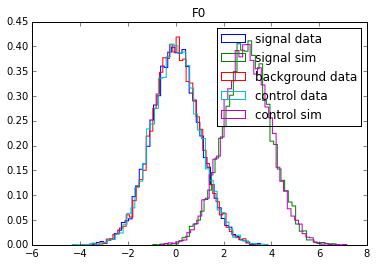

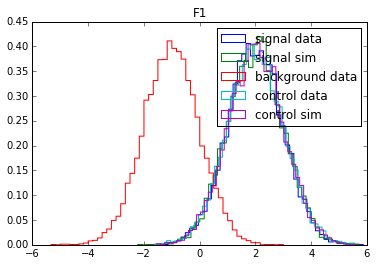

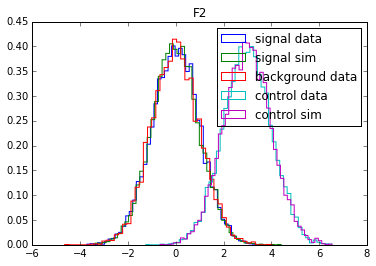

In [3]:
X_signal_data = build("signal-data")
X_signal_sim = build("signal-sim")
X_background_data = build("background-data")
X_control_data = build("control-data")
X_control_sim = build("control-sim")

for i in range(3):
    plt.hist(X_signal_data[:, i], normed=1, bins=50, histtype="step", label="signal data")
    plt.hist(X_signal_sim[:, i], normed=1, bins=50, histtype="step", label="signal sim")
    plt.hist(X_background_data[:, i], normed=1, bins=50, histtype="step", label="background data")
    plt.hist(X_control_data[:, i], normed=1, bins=50, histtype="step", label="control data")
    plt.hist(X_control_sim[:, i], normed=1, bins=50, histtype="step", label="control sim")
    plt.legend(loc="best")
    plt.title("F%d" % i)

    plt.show()

In [4]:
def compute_ks(pred_sim, pred_data):
    y = np.concatenate((np.ones(len(pred_sim)), np.zeros(len(pred_data))))
    pred = np.concatenate((pred_sim, pred_data))
    fpr, tpr, _ = roc_curve(y, pred)
    return np.max(np.abs(fpr - tpr))

In [10]:
X = np.vstack((X_background_data, X_signal_sim))
y = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_sim))))
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=1)

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

print roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

X_data = np.vstack((X_background_data, X_signal_data))
y_data = np.concatenate((np.zeros(len(X_background_data)), np.ones(len(X_signal_data))))
print roc_auc_score(y_data, rf.predict_proba(X_data)[:, 1])

print compute_ks(rf.predict_proba(X_control_sim)[:, 1],
                 rf.predict_proba(X_control_data)[:, 1])

print rf.feature_importances_

0.998047474695
0.9439348
0.8204
[ 0.48183246  0.49702686  0.02114068]


In [11]:
from sklearn.ensemble import ExtraTreesClassifier

threshold_ks = 0.05 # low value favor splitting on F2 first, high value make this variable not used
best = 0
best_seed = 0

for seed in range(10000):
    clf = ExtraTreesClassifier(n_estimators=1, max_features=1, max_leaf_nodes=5, random_state=seed)
    clf.fit(X_train, y_train)
    
    auc_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])   
    ks = compute_ks(clf.predict_proba(X_control_sim)[:, 1],
                    clf.predict_proba(X_control_data)[:, 1])
    
    if auc_test > best and ks < threshold_ks:
        best = auc_test
        best_seed = seed
        print seed, auc_test, ks

0 0.920355627809 0.0022
4 0.966350403901 0.006
95 0.972577764608 0.048
561 0.97639889413 0.0037
3269 0.979978920527 0.0413
7929 0.980226703738 0.0424


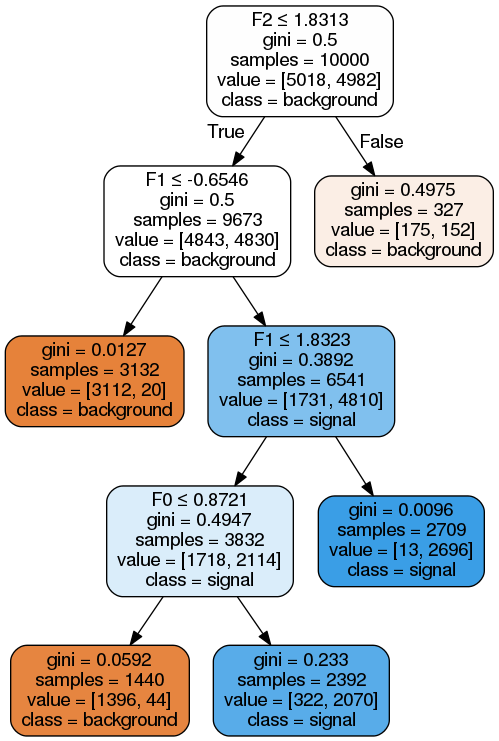

In [12]:
clf = ExtraTreesClassifier(n_estimators=1, max_features=1, max_leaf_nodes=5, random_state=best_seed)
clf.fit(X_train, y_train)

from sklearn.tree import export_graphviz
from IPython.display import Image  
with open("tree.dot", 'w') as f:
    f = export_graphviz(clf.estimators_[0], out_file=f, feature_names=["F0", "F1", "F2"],  
                         class_names=["background", "signal"],  
                         filled=True, rounded=True,  
                         special_characters=True)
!dot -Tpng tree.dot -o tree.png
Image("tree.png")

Shortcut to bruteforce : learn to separate control from scoring, then fully exploit sim signal + data background.

Even unwillingly, we have shown that we can pass the test (i.e. by learning by chance how to separate control from training) and still exploit simulation defects.

The extent of this should be evaluated by how difficult it is to separate control from training, the more difficult, the less likely this will be exploited -- and therefore the closer and reliable the control channel.